In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
#import warnings; warnings.filterwarnings("ignore")

# Python dependences
import os, time
import numpy as np   # Numpy - Python's numerical library
import matplotlib.pyplot as plt  # Matplotlib - Python's plotting library
from copy import deepcopy   # Python module for copying objects

# Import plotting basemap
from openquake.hazardlib.nrml import to_python
from openquake.plt.mapping_hazlib import HMTKBaseMap

# Input and Output Tools
# Catalogue and sources 
from openquake.hmtk.parsers.catalogue import CsvCatalogueParser   # Reads an earthquake catalogue from CSV
from openquake.hmtk.parsers.catalogue.csv_catalogue_parser import CsvCatalogueWriter  # Writes an earthquake catalogue to CSV
from openquake.hmtk.parsers.source_model.nrml04_parser import nrmlSourceModelParser  # Imports a source model from XML


# Complex fault source

In [37]:
source_model_file = "test-sources/complexfaults.xml"
source_model = to_python(source_model_file) # initiate source model parser

# Parse the seismic sources and save them into a variable called "source_model"
#source_model = parser.read_file("ComplexFaultSourceClassicalPSHA") # You must supply a name for the source model

In [38]:
map_config = {'min_lon': -2.5, 'max_lon': 2.5,
              'min_lat': -2.5, 'max_lat': 2.5,
              'title': 'ComplexFaultSourceClassicalPSHA'}

In [43]:
finame='ComplexFaultSourceClassicalPSHA.pdf'
basemap1 = HMTKBaseMap(map_config, output_folder='ComplexFaultSourceClassicalPSHA', overwrite=True)
basemap1.add_source_model(source_model) 

basemap1.savemap(verb=1, filename=finame)


> /Users/kjohnson/GEM/oq-mbtk/openquake/plt/mapping_hazlib.py(272)_plot_complex_fault()
-> fault_surface = ComplexFaultSurface.from_fault_data(
(Pdb) model
*** NameError: name 'model' is not defined
(Pdb) type(model)
*** NameError: name 'model' is not defined
(Pdb) q


BdbQuit: 

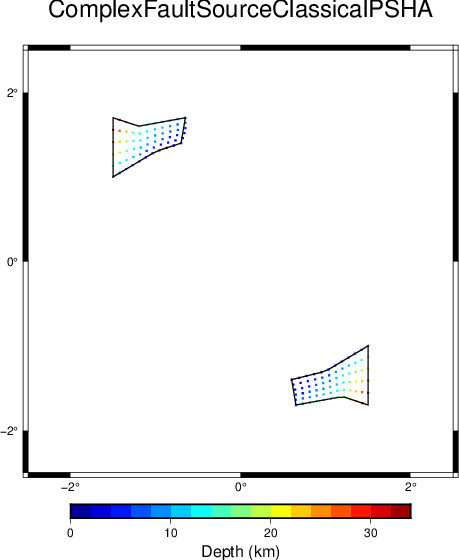

In [6]:
from wand.image import Image as WImage
WImage(filename='ComplexFaultSourceClassicalPSHA/ComplexFaultSourceClassicalPSHA.pdf')

# Point source

In [29]:
source_model_file = "test-sources/pointsources.xml"
source_model = to_python(source_model_file) # initiate source model parser

In [30]:
map_config = {'min_lon': 179, 'max_lon': 181,
              'min_lat': -1, 'max_lat': 1,
              'title': 'PointSourceClassicalPSHA'}

In [31]:
finame='PointSourceClassicalPSHA.pdf'
basemap1 = HMTKBaseMap(map_config, output_folder='PointSourceClassicalPSHA', overwrite=True)
basemap1.add_source_model(source_model) 

basemap1.savemap(verb=1, filename=finame)


> /Users/kjohnson/GEM/oq-mbtk/openquake/plt/mapping_hazlib.py(195)_plot_point_source()
-> lons = source.location.longitude
(Pdb) type(source)
<class 'openquake.hazardlib.source.point.PointSource'>
(Pdb) q


BdbQuit: 

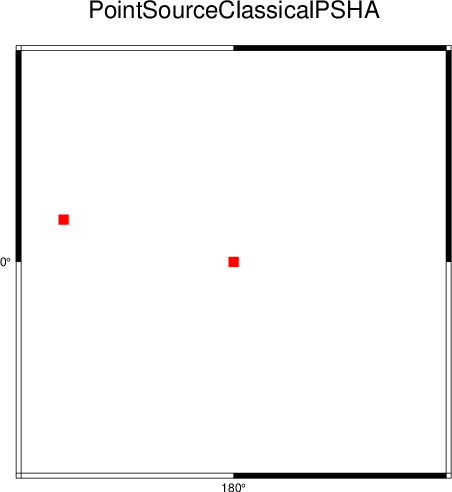

In [10]:
from wand.image import Image as WImage
WImage(filename='PointSourceClassicalPSHA/PointSourceClassicalPSHA.pdf')

# Simple fault source

In [34]:
from openquake.hazardlib.sourceconverter import SourceConverter
source_model_file = "test-sources/simplefaults.xml"
conv = SourceConverter(width_of_mfd_bin=0.5)
source_model = to_python(source_model_file, conv) # initiate source model parser

In [35]:
map_config = {'min_lon': -2, 'max_lon': 2,
              'min_lat': -2, 'max_lat': 2,
              'title': 'SimpleFaultSourceClassicalPSHA'}

In [36]:
finame='SimpleFaultSourceClassicalPSHA.pdf'
basemap1 = HMTKBaseMap(map_config, output_folder='SimpleFaultSourceClassicalPSHA', overwrite=True)
basemap1.add_source_model(source_model) 

basemap1.savemap(verb=1, filename=finame)

> /Users/kjohnson/GEM/oq-mbtk/openquake/plt/mapping_hazlib.py(220)_plot_simple_fault()
-> trace_lons = np.array([pnt.longitude
(Pdb) type(source)
<class 'openquake.hazardlib.source.simple_fault.SimpleFaultSource'>
(Pdb) q


BdbQuit: 

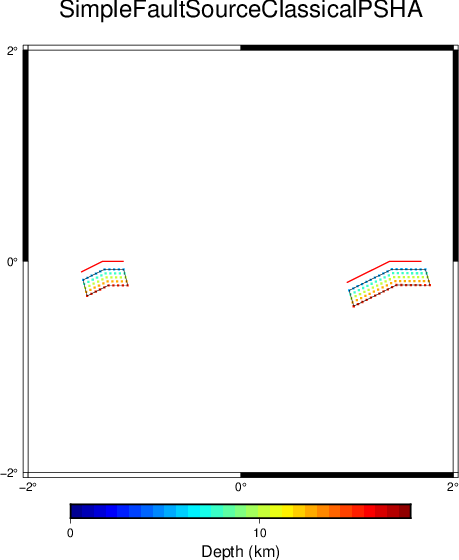

In [14]:
from wand.image import Image as WImage
WImage(filename='SimpleFaultSourceClassicalPSHA/SimpleFaultSourceClassicalPSHA.pdf')

# Area source

In [15]:
source_model_file = "test-sources/areasources.xml"
source_model = to_python(source_model_file) # initiate source model parser

In [16]:
map_config = {'min_lon': -2, 'max_lon': 2,
              'min_lat': -2, 'max_lat': 2,
              'title': 'AreaSourceClassicalPSHA'}

In [26]:
finame='AreaSourceClassicalPSHA.pdf'
basemap1 = HMTKBaseMap(map_config, output_folder='AreaSourceClassicalPSHA', overwrite=True)
basemap1.add_source_model(source_model) 

basemap1.savemap(verb=1, filename=finame)

> /Users/kjohnson/GEM/oq-mbtk/openquake/plt/mapping_hazlib.py(182)_plot_area_source()
-> poly = source.polygon
(Pdb) source
*** SyntaxError: unexpected EOF while parsing
(Pdb) type(source)
<class 'openquake.hazardlib.source.area.AreaSource'>
(Pdb) q


BdbQuit: 

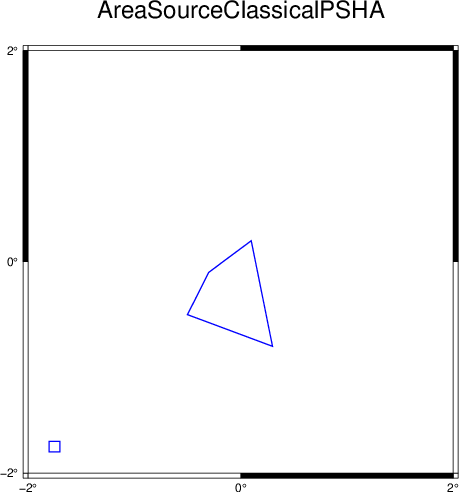

In [18]:
from wand.image import Image as WImage
WImage(filename='AreaSourceClassicalPSHA/AreaSourceClassicalPSHA.pdf')

# Focal Mechanisms 

In [19]:
map_config = {'min_lon': 24, 'max_lon': 33,
              'min_lat': 32, 'max_lat': 36,
              'title': 'AreaSourceClassicalPSHA'}

In [24]:
basemap1 = HMTKBaseMap(map_config, output_folder='FocalMech', projection='-JM30', overwrite=True)
filename = '/Users/kjohnson/GEM/oq-mbtk/openquake/plt/demo/data/FM_mockset.csv'
basemap1.add_focal_mechanism(filename, 'MT')
finame = 'FocalMech.pdf'
basemap1.savemap(verb=1, filename=finame)

gmt begin FocalMech/FocalMech.pdf
gmt basemap -R24/33/32/36 -JM30 -BWSne+t"AreaSourceClassicalPSHA" -Bx2.0 -By2.0
gmt coast -Df -R24/33/32/36 -JM30 -Wthin -Gwheat
gmt psmeca /Users/kjohnson/GEM/oq-mbtk/openquake/plt/demo/data/FM_mockset.csv -Sm0.5 -t20
gmt end
Map saved to FocalMech/FocalMech.pdf.


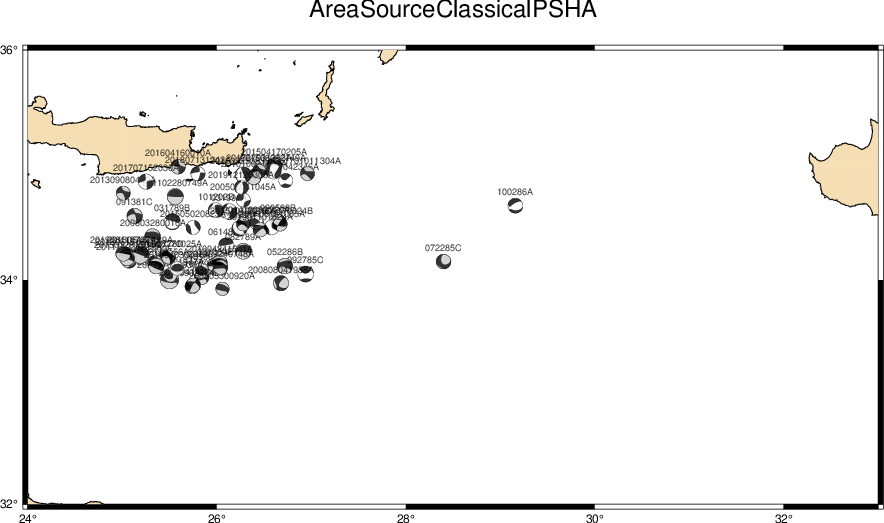

In [25]:
from wand.image import Image as WImage
WImage(filename='FocalMech/FocalMech.pdf')

In [47]:
from openquake.hmtk.parsers.catalogue import CsvCatalogueParser   # Reads an earthquake catalogue from CSV

catalogue_file = "input_data/Aegean_ExtendedCat1.csv"
parser = CsvCatalogueParser(catalogue_file) # initiate catalogue parser 
catalogue = parser.read_file(start_year=1900) # load only earthquakes after year 1900


Catalogue Attribute Identifier is not a recognised catalogue key


In [48]:
lons = catalogue.data['longitude']
lats = catalogue.data['latitude']
mags = catalogue.data['magnitude']
depths = catalogue.data['depth']

In [64]:
# Find limits of the catalogue
llon, ulon, llat, ulat = catalogue.get_bounding_box()

map_config = {'min_lon': np.floor(llon), 'max_lon': np.ceil(ulon),
              'min_lat': np.floor(llat), 'max_lat': np.ceil(ulat),
              'title': 'testing plotter'}

# Initialize a toolkit basemap
basemap1 = HMTKBaseMap(map_config, output_folder='gmt2', overwrite=True)

basemap1.add_colour_scaled_points(lons, lats, mags, label="Magnitude")
finame = 'colorscaled.pdf'
basemap1.savemap(verb=True, filename=finame)

gmt begin gmt2/colorscaled.pdf
gmt basemap -R18.0/33.0/32.0/43.0 -JM15 -BWSne+t"testing plotter" -Bx2.0 -By2.0
gmt coast -Df -R18.0/33.0/32.0/43.0 -JM15 -Wthin -Gwheat
gmt makecpt -Cjet -T2.35/7.7/30+n -D >                              gmt2/tmp_col_dat.cpt
gmt plot gmt2/tmp_dat_col.csv -Ss0.3 -Cgmt2/tmp_col_dat.cpt
gmt colorbar -DJBC -Ba1.0+lMagnitude -Cgmt2/tmp_col_dat.cpt
gmt end
Map saved to gmt2/colorscaled.pdf.


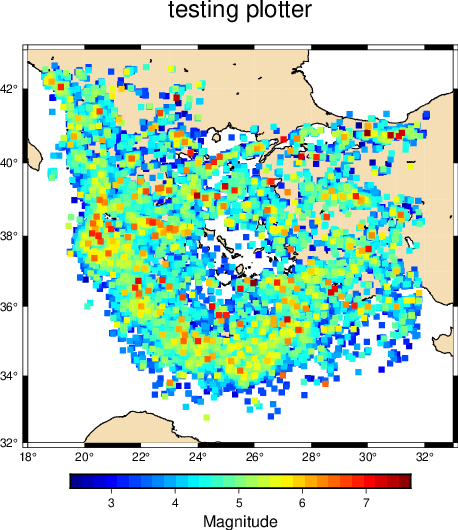

In [65]:
from wand.image import Image as WImage
WImage(filename='gmt2/colorscaled.pdf')

In [61]:
# Find limits of the catalogue
llon, ulon, llat, ulat = catalogue.get_bounding_box()

map_config = {'min_lon': np.floor(llon), 'max_lon': np.ceil(ulon),
              'min_lat': np.floor(llat), 'max_lat': np.ceil(ulat),
              'title': 'testing plotter'}

# Initialize a toolkit basemap
basemap1 = HMTKBaseMap(map_config, output_folder='gmt2', overwrite=True)

basemap1.add_size_scaled_points(lons, lats, depths, color='yellow', smin=0.1, coeff=0.05, sscale=0.5, label='Depth (km)')
finame = 'sizescaled.pdf'
basemap1.savemap(verb=True, filename=finame)

gmt begin gmt2/sizescaled.pdf
gmt basemap -R18.0/33.0/32.0/43.0 -JM15 -BWSne+t"testing plotter" -Bx2.0 -By2.0
gmt coast -Df -R18.0/33.0/32.0/43.0 -JM15 -Wthin -Gwheat
gmt plot gmt2/tmp_dat_size.csv -Ss -Gyellow -Wblack
gmt legend gmt2/legend_ss.csv -DJMR -C0.3c --FONT_ANNOT_PRIMARY=9p
gmt end
Map saved to gmt2/sizescaled.pdf.


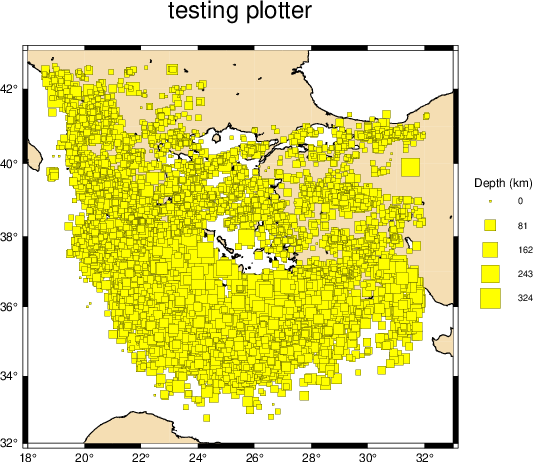

In [62]:
from wand.image import Image as WImage
WImage(filename='gmt2/sizescaled.pdf')

In [ ]:
%%bash
open .